<a href="https://colab.research.google.com/github/Faiz-Nadeem/DSA_CEP/blob/main/CEP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding Questions

1. **Market Segmentation:** How can we identify and segment different types of Etsy shops based on their sales performance, categories, and locations? Are there specific market segments that are more profitable or have unique characteristics?

2. **Predictive Modeling:** Can we develop a predictive model to forecast future sales for Etsy shops? What are the key factors and features that contribute most to the success of an Etsy shop in terms of sales? How accurate can we make these predictions?

3. **Customer Behavior:** What insights can we gain about customer behavior on Etsy? Are there patterns in terms of when and where customers are most active, or do certain shop features (e.g., sales messages, shop location) influence customer engagement and conversion rates?


# Data Mining

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #helpful for visualizing complex datasets and for generating statistical plots.

# Step 1: Data Loading
data = pd.read_csv('etsy.csv')
print(data)

      creation_date  listing_active_count  num_favorers currency_code  \
0            19-Nov                   3.0           1.0           USD   
1            19-Nov                  13.0           1.0           AUD   
2            19-Nov                   0.0           0.0           USD   
3            19-Nov                  40.0           1.0           USD   
4            19-Nov                   7.0           1.0           USD   
...             ...                   ...           ...           ...   
19995           NaN                   NaN           NaN           NaN   
19996           NaN                   NaN           NaN           NaN   
19997           NaN                   NaN           NaN           NaN   
19998           NaN                   NaN           NaN           NaN   
19999           NaN                   NaN           NaN           NaN   

      is_shop_us_based sale_message  sales_count  review_count  \
0                 True        False          0.0         

# Data Cleaning

In [10]:
# Handle missing values (for example, drop rows with missing values in 'sales' column)
data.dropna(subset=['is_shop_us_based'], inplace=True)

In [11]:
data.columns

Index(['creation_date', 'listing_active_count', 'num_favorers',
       'currency_code', 'is_shop_us_based', 'sale_message', 'sales_count',
       'review_count', 'shop_location'],
      dtype='object')

In [12]:
# Convert 'date' column to datetime format with the specific date format "DD-MMM"
data['creation_date'] = pd.to_datetime(data['creation_date'], format='%d-%b')

In [13]:
# Optionally, you can extract year, month, and day as shown in the previous code snippets.
data['year'] = data['creation_date'].dt.year
data['month'] = data['creation_date'].dt.month
data['day'] = data['creation_date'].dt.day
data['weekday'] = data['creation_date'].dt.weekday  # Monday=0, Sunday=6

In [14]:
# Convert 'date' column to datetime format
data['creation_date'] = pd.to_datetime(data['creation_date'])

In [15]:
# Remove duplicates (if any)
data.drop_duplicates(inplace=True)

In [16]:
# Outlier detection and treatment (for example, removing outliers in 'price' column)
Q1 = data['is_shop_us_based'].quantile(0.25)
Q3 = data['is_shop_us_based'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['is_shop_us_based'] >= (Q1 - 1.5 * IQR)) & (data['is_shop_us_based'] <= (Q3 + 1.5 * IQR))]
print(data)

     creation_date  listing_active_count  num_favorers currency_code  \
0       1900-11-19                   3.0           1.0           USD   
1       1900-11-19                  13.0           1.0           AUD   
2       1900-11-19                   0.0           0.0           USD   
3       1900-11-19                  40.0           1.0           USD   
4       1900-11-19                   7.0           1.0           USD   
...            ...                   ...           ...           ...   
9988    1900-11-19                   1.0           2.0           GBP   
9989    1900-11-19                   9.0           0.0           USD   
9990    1900-11-19                  13.0           1.0           USD   
9996    1900-11-19                  11.0           1.0           USD   
9998    1900-11-19                  10.0           0.0           USD   

     is_shop_us_based sale_message  sales_count  review_count  \
0                True        False          0.0           0.0   
1    

In [17]:
# Summary statistics
print(data.describe())


       listing_active_count  num_favorers  sales_count  review_count    year  \
count           4873.000000   4873.000000  4873.000000   4873.000000  4873.0   
mean              12.002463      1.661810     2.111225     -0.693002  1900.0   
std               39.195449      5.035642    17.913561      8.966902     0.0   
min                0.000000      0.000000   -99.000000    -99.000000  1900.0   
25%                2.000000      0.000000     0.000000      0.000000  1900.0   
50%                5.000000      1.000000     0.000000      0.000000  1900.0   
75%               13.000000      2.000000     1.000000      0.000000  1900.0   
max             1749.000000    130.000000   498.000000     19.000000  1900.0   

             month          day      weekday  
count  4873.000000  4873.000000  4873.000000  
mean     11.082085    18.999179     0.168274  
std       0.294715     0.057301     0.559662  
min       4.000000    15.000000     0.000000  
25%      11.000000    19.000000     0.000000

# Data Exploration

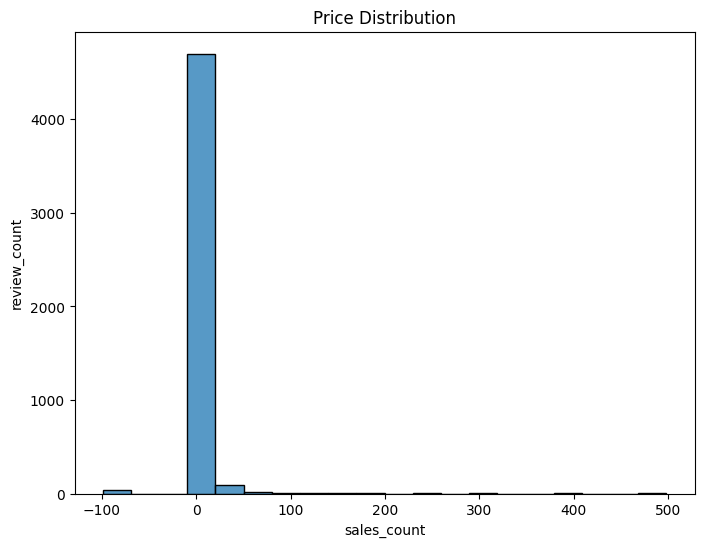

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data visualization (example: histogram of 'price')
plt.figure(figsize=(8, 6))
sns.histplot(data['sales_count'], bins=20)
plt.xlabel('sales_count')
plt.ylabel('review_count')
plt.title('Price Distribution')
plt.show()



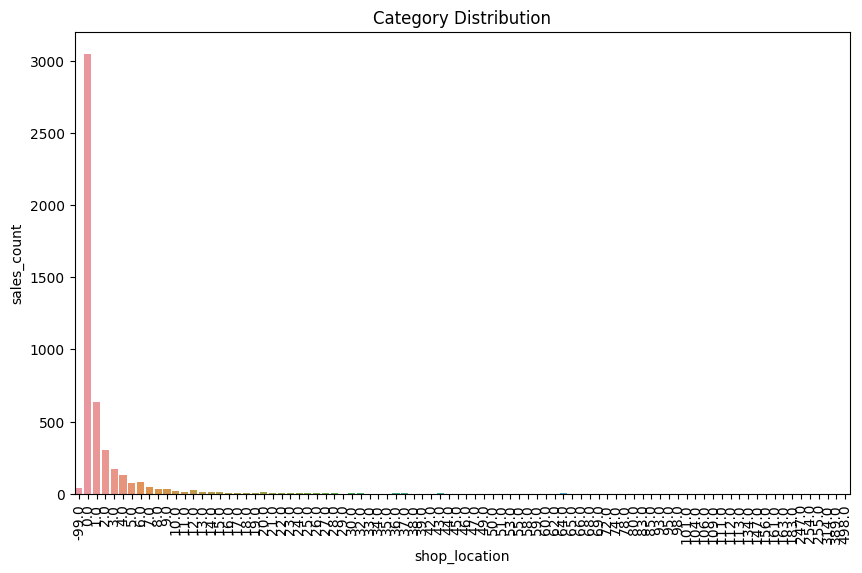

In [19]:

# Explore categorical variables (example: bar plot of 'category')
plt.figure(figsize=(10, 6))
sns.countplot(x='sales_count', data=data)
plt.xticks(rotation=90)
plt.xlabel('shop_location')
plt.ylabel('sales_count')
plt.title('Category Distribution')
plt.show()

<ipython-input-20-b5c9e340dff3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


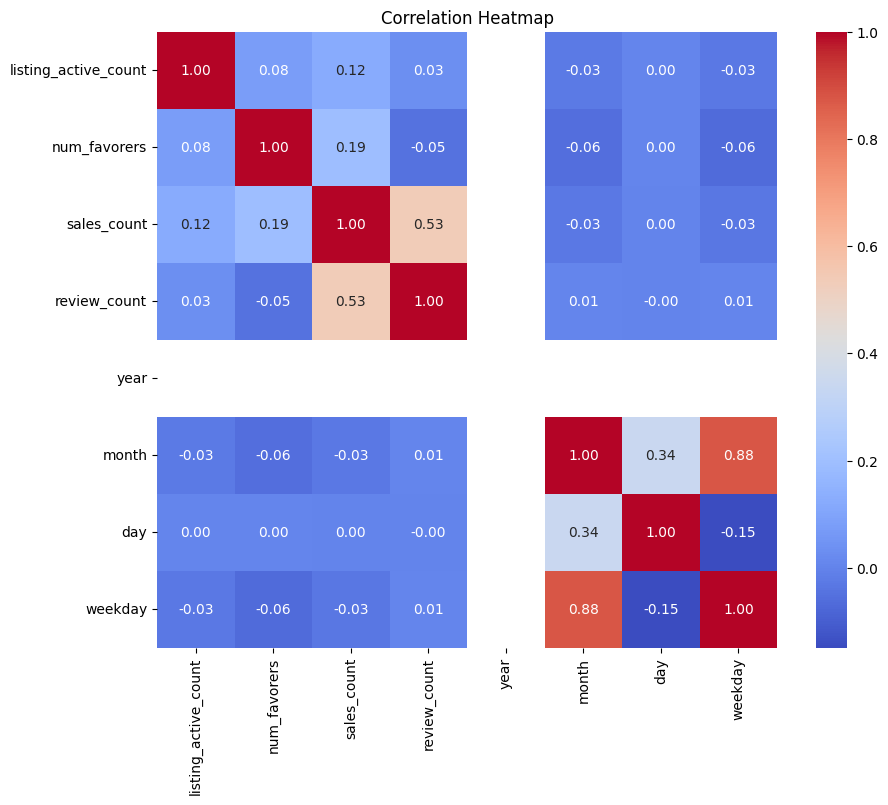

In [20]:

# Correlation analysis (for numerical features)
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Feature Engineering

In [21]:
# 1. Date Features
# Extract year, month, day, and weekday from the 'date' column
data['year'] = data['creation_date'].dt.year
data['month'] = data['creation_date'].dt.month
data['day'] = data['creation_date'].dt.day
data['weekday'] = data['creation_date'].dt.weekday  # Monday=0, Sunday=6

In [22]:
# 2. Text Features (if applicable)
# Example: Calculate the length of the 'shop_description' column
data['description_length'] = data['shop_location'].str.len()

In [23]:
# 3. Categorical Features
# Example: Convert 'category' to numerical labels using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['category_encoded'] = label_encoder.fit_transform(data['is_shop_us_based'])

In [24]:
# 4. Numerical Features (if applicable)
# Example: Create a new feature by scaling 'price' to a 0-1 range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['scaled_price'] = scaler.fit_transform(data[['sales_count']])

In [25]:
# 5. Interaction Features (if applicable)
# Example: Create an interaction feature between 'year' and 'month'
data['year_month_interaction'] = data['year'] * data['month']

In [26]:
# 6. Aggregated Features (if applicable)
# Example: Calculate the mean sales per category
category_mean_sales = data.groupby('is_shop_us_based')['sales_count'].mean().reset_index()
category_mean_sales.rename(columns={'sales_count': 'category_mean_sales'}, inplace=True)
data = data.merge(category_mean_sales, on='is_shop_us_based', how='left')

print(data)

     creation_date  listing_active_count  num_favorers currency_code  \
0       1900-11-19                   3.0           1.0           USD   
1       1900-11-19                  13.0           1.0           AUD   
2       1900-11-19                   0.0           0.0           USD   
3       1900-11-19                  40.0           1.0           USD   
4       1900-11-19                   7.0           1.0           USD   
...            ...                   ...           ...           ...   
4868    1900-11-19                   1.0           2.0           GBP   
4869    1900-11-19                   9.0           0.0           USD   
4870    1900-11-19                  13.0           1.0           USD   
4871    1900-11-19                  11.0           1.0           USD   
4872    1900-11-19                  10.0           0.0           USD   

     is_shop_us_based sale_message  sales_count  review_count  \
0                True        False          0.0           0.0   
1    

In [27]:
data.columns


Index(['creation_date', 'listing_active_count', 'num_favorers',
       'currency_code', 'is_shop_us_based', 'sale_message', 'sales_count',
       'review_count', 'shop_location', 'year', 'month', 'day', 'weekday',
       'description_length', 'category_encoded', 'scaled_price',
       'year_month_interaction', 'category_mean_sales'],
      dtype='object')

# Predictive Modeling By Linear Regression

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Define features (X) and target variable (y)
# Replace the column names with the actual ones from your dataset
X = data[['listing_active_count', 'num_favorers', 'sales_count', 'review_count', 'year', 'month', 'day', 'weekday']]
y = data['sales_count']  # Replace 'sales_count' with your actual target variable

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

In [31]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# You can now use the trained model for predictions on new data.


Mean Squared Error: 1.2292748364883211e-29
R-squared: 1.0


# Data Visualization

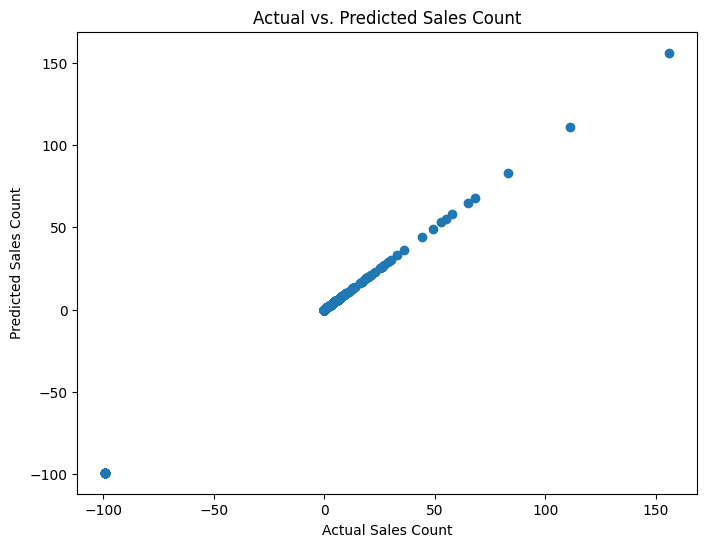

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already trained the model and made predictions
# Replace y_pred with your model's predictions and y_test with the actual test set target values

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales Count')
plt.ylabel('Predicted Sales Count')
plt.title('Actual vs. Predicted Sales Count')
plt.show()


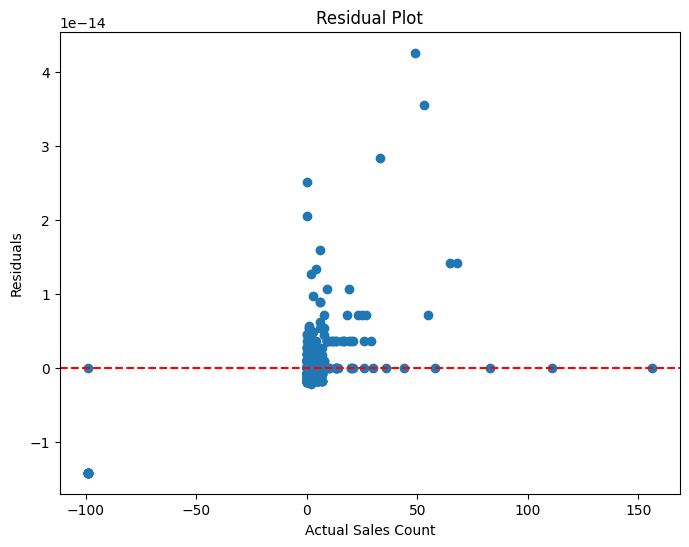

In [33]:
# Residual plot (Actual vs. Residuals)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals)
plt.xlabel('Actual Sales Count')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()




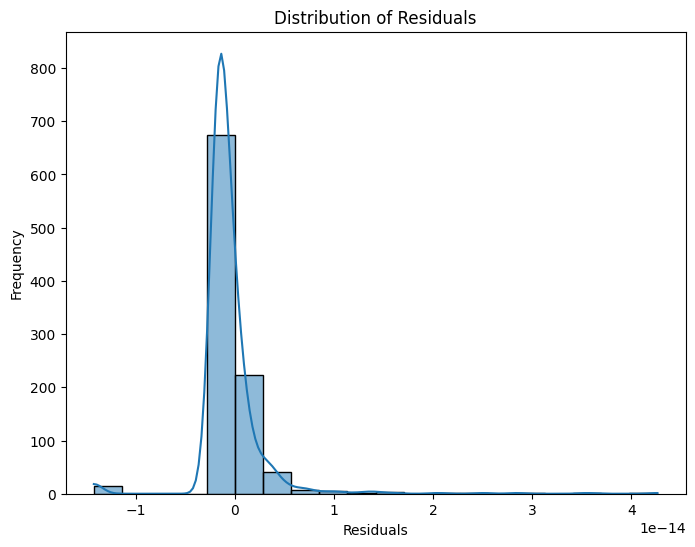

In [34]:
# Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

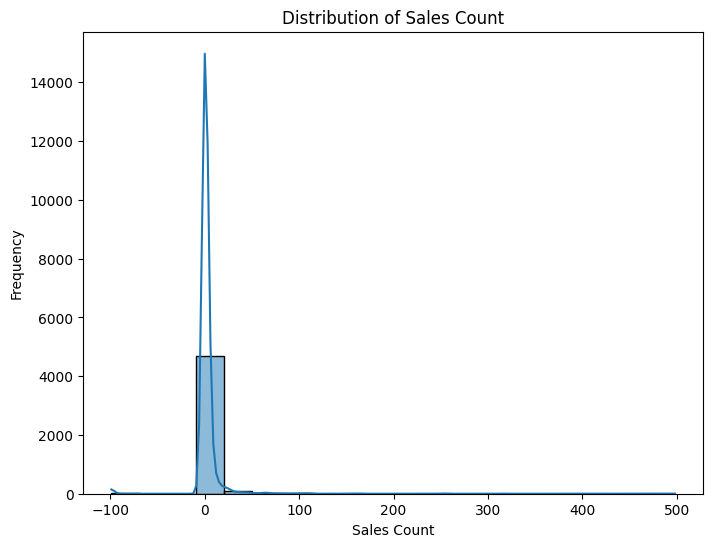

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already trained the model and made predictions
# Replace y_pred with your model's predictions and y_test with the actual test set target values

# Distribution of the Target Variable (Sales Count)
plt.figure(figsize=(8, 6))
sns.histplot(data['sales_count'], bins=20, kde=True)
plt.xlabel('Sales Count')
plt.ylabel('Frequency')
plt.title('Distribution of Sales Count')
plt.show()


